# Step 1: Load the Dataset

In [12]:
import pandas as pd

# Load the dataset
df = pd.read_csv('fake_job_postings.csv')

# Preview the dataset
print("Shape:", df.shape)
df.head()

Shape: (17880, 18)


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


# Step 2: Clean the Data

In [4]:
import pandas as pd

# Keep only the useful columns
df = df[['title', 'location', 'department', 'company_profile',
         'description', 'requirements', 'benefits', 'fraudulent']]

# Combine selected text fields into a single 'text' field
df['text'] = df[['title', 'company_profile', 'description', 'requirements', 'benefits']].fillna('').agg(' '.join, axis=1)

# Drop rows with missing label (just in case)
df = df[df['fraudulent'].notnull()]

# Check final shape and a sample
print(df.shape)
df[['text', 'fraudulent']].head(3)

(17880, 9)


,text,fraudulent
0,"Marketing Intern We're Food52, and we've creat...",0
1,Customer Service - Cloud Video Production 90 S...,0
2,Commissioning Machinery Assistant (CMA) Valor ...,0


# Step 3: Vectorize Text & Split the Dataset

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Features and target
X = df['text']
y = df['fraudulent']

# Vectorize the text data
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)


Train set size: (14304, 5000)
Test set size: (3576, 5000)


# Step 4: Model Training & Evaluation

🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       1.00      0.59      0.74       173

    accuracy                           0.98      3576
   macro avg       0.99      0.79      0.87      3576
weighted avg       0.98      0.98      0.98      3576

🔍 Confusion Matrix:
[[3403    0]
 [  71  102]]


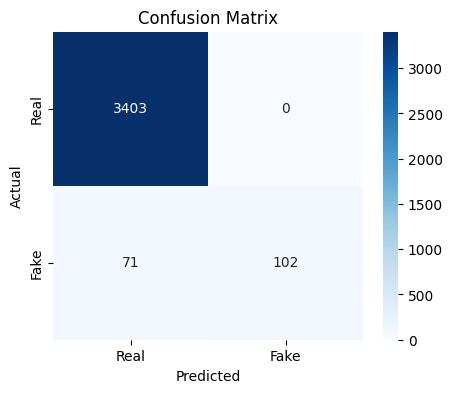

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print("🔍 Classification Report:")
print(classification_report(y_test, y_pred))

print("🔍 Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

📋 Summary of Model Metrics:
              precision  recall  f1-score  support
0                 0.980   1.000     0.990  3403.00
1                 1.000   0.590     0.742   173.00
accuracy          0.980   0.980     0.980     0.98
macro avg         0.990   0.795     0.866  3576.00
weighted avg      0.981   0.980     0.978  3576.00


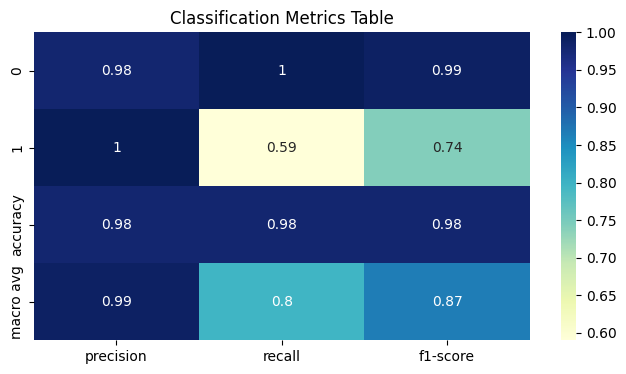

In [7]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Round for better readability
report_df = report_df.round(3)

# Display the table
print("📋 Summary of Model Metrics:")
print(report_df)

# Optionally, plot it as a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu")
plt.title("Classification Metrics Table")
plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'Linear SVM': LinearSVC(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Store results
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = report['weighted avg']  # Using weighted avg for fair comparison

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df[['precision', 'recall', 'f1-score']].round(3)

# Find and highlight the best model
best_model = results_df['f1-score'].idxmax()
results_df['Best'] = ['✅' if idx == best_model else '' for idx in results_df.index]

print("📊 Model Comparison Summary:")
print(results_df)


📊 Model Comparison Summary:
                     precision  recall  f1-score Best
Logistic Regression      0.974   0.973     0.968     
Naive Bayes              0.968   0.968     0.960     
Linear SVM               0.985   0.985     0.984    ✅
Random Forest            0.981   0.980     0.978     


/tmp/ipykernel_2558/2236930517.py:34: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/miniconda/envs/python3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


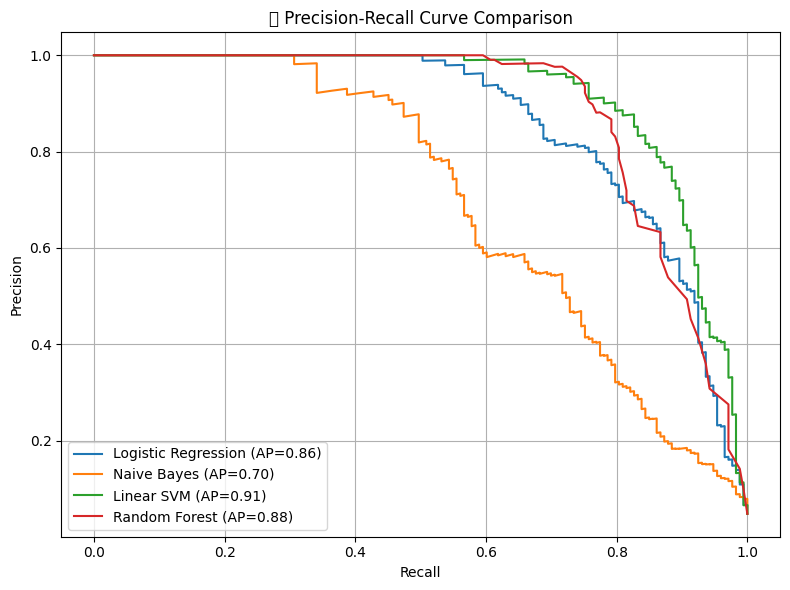

In [16]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.calibration import CalibratedClassifierCV

# Prepare plot
plt.figure(figsize=(8, 6))

# Loop through models
for name, model in models.items():
    # Use calibrated version for SVM
    if name == 'Linear SVM':
        model = CalibratedClassifierCV(model)
        model.fit(X_train, y_train)

    # Get predicted probabilities for the positive class
    try:
        y_scores = model.predict_proba(X_test)[:, 1]
    except AttributeError:
        # fallback for models without predict_proba
        y_scores = model.decision_function(X_test)

    # Compute precision-recall values
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    avg_precision = average_precision_score(y_test, y_scores)

    # Plot the curve
    plt.plot(recall, precision, label=f"{name} (AP={avg_precision:.2f})")

# Final touches
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("📈 Precision-Recall Curve Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()